In [1]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)

In [3]:
import numpy as np
f_data = np.load('f.npy')
f_data.shape

(300, 100, 100)

In [4]:
pca.fit(f_data.reshape(300,-1))

PCA(n_components=50)

In [6]:
pca.components_.shape

(50, 10000)

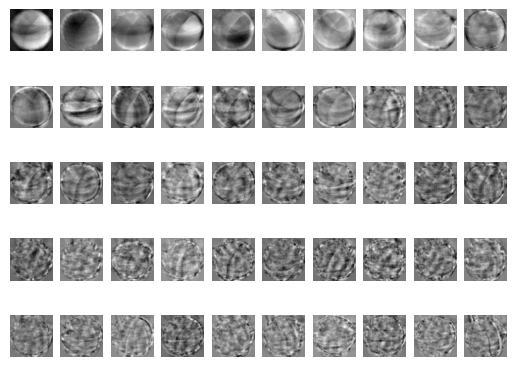

In [12]:
import matplotlib.pyplot as plt
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(pca.components_[i].reshape(100,100), cmap='gray_r')
  plt.axis('off')
plt.show()

In [14]:
f_data_pca = pca.transform(f_data.reshape(300,-1))
f_data_pca.shape

(300, 50)

복원
  - pca 축소과정에서 없어진 중요하지 않은 특성들은 복원과정에서 제거된다. -노이즈 제거


In [15]:
f_inverse =  pca.inverse_transform(f_data_pca)
f_inverse.shape

(300, 10000)

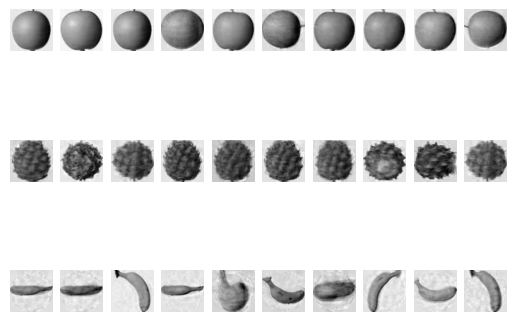

In [17]:
# 각각의 class별 이미지  10개씩 display
#0 ~9
#100 ~ 109   i:10  100
#200 ~ 209   i:20  200
for j in range(3):
  for i in range(10):
    idx = j * 100 + i
    plt.subplot(3,10,i+1 + (j*10) )
    plt.imshow(f_inverse[idx].reshape(100,100),cmap='gray_r')
    plt.axis('off')
plt.show()

적절한 주성분의 개수는 구하는 방법
  - 설명된 분산(Explained Variance)
  - 각 주성분의 고유값을 전체 고유값의 하비으로 나눈 비율을 누적해서 더한것
  - 설명된 분산이 크다는 것은 원래데이터의 변동성을 보전한다는 의미


In [20]:
np.sum(pca.explained_variance_ratio_)

0.9215753265979952

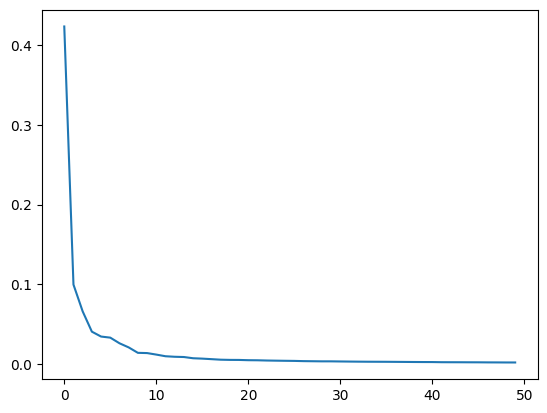

In [19]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

Kmeans : 비지도학습-클러스터 분류

LogisticRegression : 지도학습 분류

In [21]:
target = np.array([0]*100 + [1]*100 + [2]*100)

- 머신러닝 모델이 정해지면
- 데이터 나누지 말고 빠르게 평가할수 있는 방법
- cross_validate

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [24]:
from sklearn.model_selection import cross_validate

In [25]:
# pca적용하지 않는 순수데이터 VS pca 차원 축소한 데이터로 교차검증

In [26]:
scores =  cross_validate(lr,f_data.reshape(300,-1),target)
scores_pca =  cross_validate(lr,f_data_pca.reshape(300,-1),target)

In [28]:
scores['test_score'].mean(), scores['fit_time'].mean()

(0.9966666666666667, 1.5112032413482666)

In [29]:
scores_pca['test_score'].mean(), scores_pca['fit_time'].mean()

(1.0, 0.026652717590332033)

In [30]:
pca = PCA(n_components=0.5)
pca.fit(f_data.reshape(300,-1) )

PCA(n_components=0.5)

In [31]:
pca.n_components_

2

In [32]:
f_data_05 =  pca.transform(f_data.reshape(300,-1))

In [33]:
f_data_05.shape

(300, 2)

In [35]:
lr = LogisticRegression(max_iter = 1000)
scores_05 =  cross_validate(lr,f_data_05,target)
scores_05['test_score'].mean(), scores_05['fit_time'].mean()

(0.9966666666666667, 0.06082563400268555)

In [36]:
# 주성분 분석에서 가장 성능이 높았던 f_data_pca를 가지고 Kmean에 적용

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(f_data_pca, target,random_state=42)

In [38]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test,y_test)

(1.0, 1.0)

In [40]:
lr.predict(f_data_pca)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
np.unique(lr.predict(f_data_pca), return_counts=True)

(array([0, 1, 2]), array([100, 100, 100]))

비 지도학습인 k평균으로 군집을 분류 해서 이전시간과 비교
  - PCA데이터 vs 비 PCA

In [49]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(f_data_pca)
np.unique(km.labels_,return_counts=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([ 98,  91, 111]))

In [48]:
km = KMeans(n_clusters=3)
km.fit(f_data.reshape(300,-1))
np.unique(km.labels_,return_counts=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

In [51]:
km = KMeans(n_clusters=3)
km.fit(f_data_05)
np.unique(km.labels_,return_counts=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([ 99, 110,  91]))

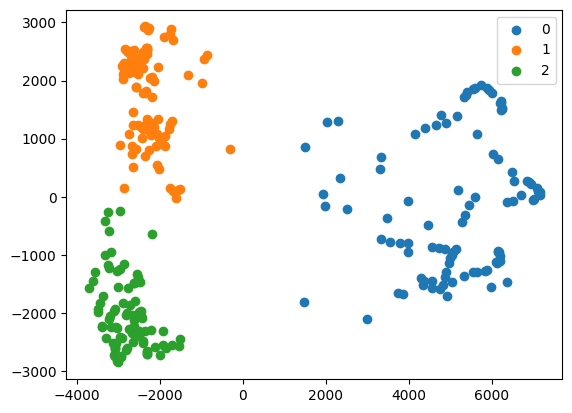

In [53]:
for i in range(3):
  data = f_data_05[km.labels_ == i]
  plt.scatter(data[:,0], data[:,1],label = i)
plt.legend()
plt.show()